# End to end Dog vision project:
About the project:
it is a deep learning project that try to find out the doog breeds using dataset of dogs images

## 1. Problem:
I want to find out if the dog breed in the image

## 2. Data:
from kaggle:
https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evaluation:
Submissions are evaluated on **Multi Class Log Loss** between the predicted probability and the observed target.

## 4. Features:
Our features are the different photos of dog breeds
<br>🔹 almost 10,000 image for the train set </br>
🔹 almost 10,000 image for the test set


# the introduction of the instruction:
# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [ ]:
# the introduction of the instruction:

In [ ]:
# Importing the basic tools
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow version:",tf.__version__)
print("TensorFlow hub version:", hub.__version__)

TensorFlow version: 2.18.0
TensorFlow hub version: 0.16.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#get my data ready
# How to unzip your files
#!unzip /content/drive/MyDrive/dog-breed-identification.zip -d /content/drive/MyDrive/dog-vision

In [ ]:
# Check that I am using GPU
tf.config.list_physical_devices("GPU")

[]

In [ ]:
import pandas as pd
labels = pd.read_csv("/content/drive/MyDrive/dog-vision/labels.csv")

In [ ]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


In [ ]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels["breed"][labels["breed"].str.contains("^golden", regex=True)]

,breed
4,golden_retriever
25,golden_retriever
37,golden_retriever
127,golden_retriever
342,golden_retriever
...,...
9575,golden_retriever
9595,golden_retriever
9833,golden_retriever
10172,golden_retriever


In [ ]:
labels.value_counts()

,,count
id,breed,
fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever,1
000bec180eb18c7604dcecc8fe0dba07,boston_bull,1
001513dfcb2ffafc82cccf4d8bbaba97,dingo,1
001cdf01b096e06d78e9e5112d419397,pekinese,1
00214f311d5d2247d5dfe4fe24b2303d,bluetick,1
...,...,...
007b8a07882822475a4ce6581e70b1f8,redbone,1
007ff9a78eba2aebb558afea3a51c469,lakeland_terrier,1
008887054b18ba3c7601792b6a453cc3,boxer,1


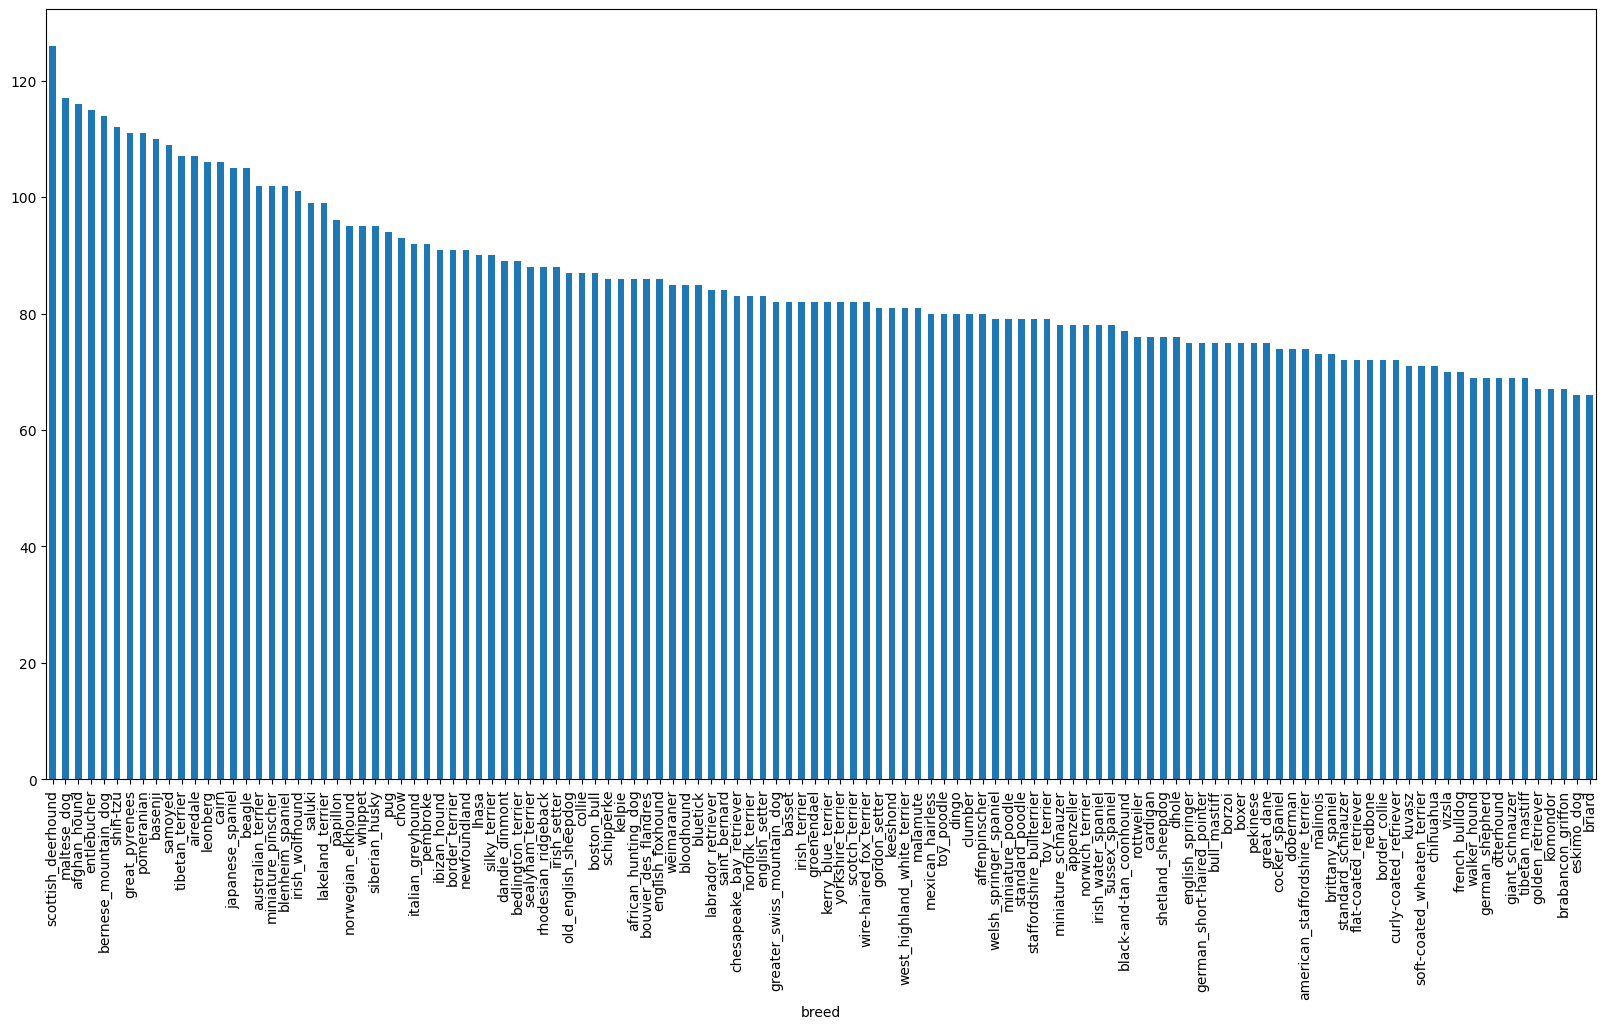

In [ ]:
labels["breed"].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels["breed"].value_counts().median()

82.0

In [ ]:
len(labels[labels["breed"]=="scottish_deerhound"])

126

In [ ]:
# get the all pathes of your X's
images_names=[]
for i in labels["id"]:
  image=f"/content/drive/MyDrive/dog-vision/train/{i}.jpg"
  #images_names.loc[:,ln(images_names)]=image
  images_names.append(image)
images_names[1:3]

['/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg']

In [ ]:
# Or you can use list comprehension
my_images_name=["/content/drive/MyDrive/dog-vision/train/"+image+".jpg" for image in labels["id"]]
my_images_name[:3]

['/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg']

In [ ]:
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


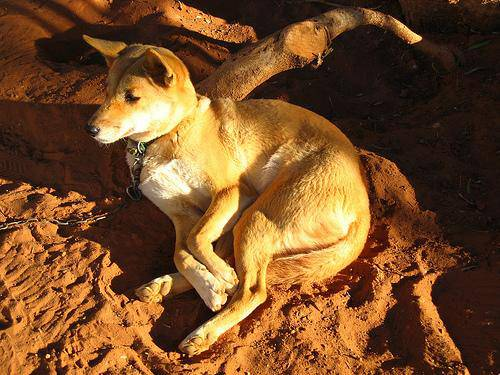

In [ ]:
from IPython.display import Image
Image(my_images_name[1])

In [ ]:
import os
len(os.listdir("/content/drive/MyDrive/dog-vision/train/"))

10222

In [ ]:
import os
os.listdir("/content/drive/MyDrive/")

['Ben 10 Ultimate Alien Cosmic Destruction (Esp).cso',
 'dog-breed-identification.zip',
 'Colab Notebooks',
 'Toysample.xlsx',
 'kaggle_api',
 '.ipynb_checkpoints',
 'dog-vision',
 'neural_network',
 'h7nozrm8.png',
 'events.out.tfevents.1748874356.496a38f29adc.41850.0.v2',
 'events.out.tfevents.1748874591.496a38f29adc.41850.2.v2',
 'events.out.tfevents.1748874621.496a38f29adc.41850.3.v2',
 'events.out.tfevents.1748874761.496a38f29adc.41850.4.v2',
 'events.out.tfevents.1748874841.496a38f29adc.41850.5.v2',
 'events.out.tfevents.1748949905.54c8083461cf.251.9.v2',
 'events.out.tfevents.1748952568.54c8083461cf.251.21.v2',
 'events.out.tfevents.1748952632.54c8083461cf.251.22.v2',
 'variables',
 'assets',
 'saved_model.pb',
 'fingerprint.pb',
 'keras_metadata.pb',
 'my_saved_model',
 'my_saved_model.h5',
 'my_model.json',
 'my_saved_model_the_full_model_2025-06-11--13-07-32.h5',
 'my_saved_model_the_full_model_2025-06-11--13-17-38.h5',
 'my_saved_model_the_full_model_3_2025-06-13--02-48-16.h

In [ ]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


In [ ]:
import numpy as np
unique_labels=np.unique(labels["breed"])
len(unique_labels)

120

In [ ]:
np.array(labels["breed"][0] == unique_labels)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
my_np = np.array(labels["breed"][0] == unique_labels).astype("int")
my_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
my_breeds_array= np.array([i == unique_labels for i in labels["breed"] ]).astype("int")
len(my_breeds_array)

10222

In [ ]:
my_breeds_array[0],labels["breed"][0],unique_labels[19]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'boston_bull',
 'boston_bull')

## Split your data into train and valid sets

In [ ]:
X= my_images_name
y= my_breeds_array

In [ ]:
X[:2],y[:2]

(['/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  '/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'],
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [ ]:
len(X)

10222

In [ ]:

NUM_IMG = 1000 #@param{type:"slider",min:1000 , max:10000, step:100}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMG],y[:NUM_IMG],test_size=0.2,random_state=42)

## Turn your images into tensors:

In [ ]:
import tensorflow as tf

In [ ]:
# How to read an image:
from matplotlib.pyplot import imread
image=imread(X[1])

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 51,  34,  26],
        [ 55,  38,  30],
        [ 61,  43,  33],
        ...,
        [127,  92,  62],
        [ 77,  42,  12],
        [167, 132, 102]],

       [[ 63,  44,  37],
        [ 64,  46,  36],
        [ 63,  45,  35],
        ...,
        [113,  82,  54],
        [ 44,  13,   0],
        [ 71,  40,  12]],

       [[ 58,  38,  29],
        [ 58,  38,  27],
        [ 57,  37,  26],
        ...,
        [ 60,  33,  12],
        [ 53,  26,   5],
        [ 63,  36,  15]],

       ...,

       [[192, 110,  34],
        [183, 104,  29],
        [183, 103,  34],
        ...,
        [ 52,  26,  27],
        [ 34,   8,   9],
        [ 21,   0,   0]],

       [[181,  99,  23],
        [200, 121,  46],
        [207, 127,  58],
        ...,
        [ 35,   7,   6],
        [ 59,  29,  29],
        [ 88,  60,  57]],

       [[182, 100,  24],
        [203, 124,  49],
        [216, 136,  67],
        ...,
        [ 38,   9,   

In [ ]:
# Take an image filepath as input:
tf.io.read_file(X[1])

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
tf.image.decode_jpeg(tf.io.read_file(X[1]),channels=3)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 51,  34,  26],
        [ 55,  38,  30],
        [ 61,  43,  33],
        ...,
        [127,  92,  60],
        [ 76,  41,   9],
        [167, 132, 100]],

       [[ 62,  43,  36],
        [ 63,  45,  35],
        [ 63,  45,  35],
        ...,
        [113,  82,  53],
        [ 44,  13,   0],
        [ 71,  40,  11]],

       [[ 57,  37,  28],
        [ 57,  37,  26],
        [ 56,  36,  25],
        ...,
        [ 59,  32,  11],
        [ 53,  26,   5],
        [ 63,  36,  15]],

       ...,

       [[192, 111,  32],
        [183, 104,  27],
        [182, 104,  32],
        ...,
        [ 50,  26,  26],
        [ 33,   7,   6],
        [ 19,   0,   0]],

       [[181, 100,  21],
        [200, 121,  44],
        [206, 128,  56],
        ...,
        [ 32,   7,   3],
        [ 58,  30,  27],
        [ 86,  61,  57]],

       [[181, 100,  21],
        [202, 123,  46],
        [215, 137,  65],
        ...,
        [ 37,  10,   

In [ ]:
tf.image.convert_image_dtype(tf.image.decode_jpeg(tf.io.read_file(X[1]),channels=3),tf.float32)

<tf.Tensor: shape=(375, 500, 3), dtype=float32, numpy=
array([[[0.20000002, 0.13333334, 0.10196079],
        [0.21568629, 0.14901961, 0.11764707],
        [0.2392157 , 0.16862746, 0.12941177],
        ...,
        [0.49803925, 0.36078432, 0.23529413],
        [0.29803923, 0.16078432, 0.03529412],
        [0.654902  , 0.5176471 , 0.3921569 ]],

       [[0.24313727, 0.16862746, 0.14117648],
        [0.24705884, 0.1764706 , 0.13725491],
        [0.24705884, 0.1764706 , 0.13725491],
        ...,
        [0.4431373 , 0.32156864, 0.20784315],
        [0.17254902, 0.0509804 , 0.        ],
        [0.2784314 , 0.15686275, 0.04313726]],

       [[0.22352943, 0.14509805, 0.10980393],
        [0.22352943, 0.14509805, 0.10196079],
        [0.21960786, 0.14117648, 0.09803922],
        ...,
        [0.23137257, 0.1254902 , 0.04313726],
        [0.20784315, 0.10196079, 0.01960784],
        [0.24705884, 0.14117648, 0.05882353]],

       ...,

       [[0.75294125, 0.43529415, 0.1254902 ],
        [0.71

In [ ]:
tf.image.resize(tf.image.convert_image_dtype(tf.image.decode_jpeg(tf.io.read_file(X[1]),channels=3),tf.float32),  [224,224])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.22176053, 0.1532646 , 0.12077089],
        [0.24290617, 0.17007563, 0.12532842],
        [0.25025794, 0.16272292, 0.10750583],
        ...,
        [0.4866906 , 0.31810698, 0.18481737],
        [0.46775866, 0.32910115, 0.20204483],
        [0.36027768, 0.2283099 , 0.11981372]],

       [[0.22331059, 0.14479166, 0.10454448],
        [0.20956516, 0.13433544, 0.08120592],
        [0.20576334, 0.11818807, 0.06297097],
        ...,
        [0.34747207, 0.21052358, 0.10098223],
        [0.25428382, 0.14531395, 0.05989731],
        [0.22268865, 0.11715643, 0.03506609]],

       [[0.21673436, 0.12777252, 0.0741048 ],
        [0.20701681, 0.11805496, 0.05878148],
        [0.22288738, 0.12433178, 0.0666433 ],
        ...,
        [0.19956292, 0.10319562, 0.05528758],
        [0.24323113, 0.17113218, 0.12510629],
        [0.17322923, 0.11525137, 0.08183777]],

       ...,

       [[0.71888185, 0.40606675, 0.10109472],
        [0.72

In [ ]:
# function to preprocess images:
IMG_SIZE=224
def image_processor(image_path,IMG_SIZE=IMG_SIZE):
  '''
  this function to turn your image into tensor with resizing
  and normalizing.
  '''
    # read your path:
  image=tf.io.read_file(image_path)
  #convert it into tensor:
  image=tf.image.decode_jpeg(image,channels=3)
  #Normalize your tensor:
  image=tf.image.convert_image_dtype(image,dtype=tf.float32)
  #resize your tensor:
  image=tf.image.resize(image,[IMG_SIZE,IMG_SIZE])

  return image


In [ ]:
# function to get the labels and images pairs:
def my_pairs(image_path,labels):
  '''
  a function to provide the image path and its labels with a sense of pairs
  '''
  data = image_processor(image_path,IMG_SIZE)
  return data,labels


In [ ]:
# the function that I will use to transfor our data into tensors to batches
# for training, evaluation and for testing
# it's very important also to shows that I already split my each set into batches
# So, you don't need to split it in the fitting process

Batch_size=23

def my_func(X=X,y=None,Batch_size=Batch_size,val=None,test=None):
  """
  it's a function to provide batches for training, validation, and testing sets

  """
  if test== True:
    print("Creating test data Batches...")
    dataset=tf.data.Dataset.from_tensor_slices(tf.constant(X)) # convert X_test into string tensors
    dataset_batchs=dataset.map(image_processor).batch(Batch_size) # split it into batches
    return dataset_batchs

  elif val==True:
    print("Creating val data Batches...")
    dataset=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # convert X_val and y_val into string tensors
    dataset_batchs=dataset.map(my_pairs).batch(Batch_size) # split it into batches without shuffling
    return dataset_batchs
  else:
    print("Creating training data Batches...")
    dataset=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # convert X_train and y_train into string tensors
    dataset= dataset.shuffle(len(X)) # shuffle your train data ➡️ becuase that makes the learning process more effective
    dataset_batchs=dataset.map(my_pairs).batch(Batch_size) # split it into batches
    return dataset_batchs

In [ ]:
# here it is your validation data. So, no more X_val and y_val
# you have your X_val as tensors and the same thing with your y_val
val_batches= my_func(X_val,y_val,val=True)
for i in val_batches.take(1):
  print(i)

Creating val data Batches...
(<tf.Tensor: shape=(23, 224, 224, 3), dtype=float32, numpy=
array([[[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],

        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],

        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],

        ...,

   

In [ ]:
# here it is your training data. So, no more X_train and y_train
# you have your X_train as tensors and the same thing with your y_train
train_batches= my_func(X_train,y_train)
for i in train_batches.take(1):
  print(i)

Creating training data Batches...
(<tf.Tensor: shape=(23, 224, 224, 3), dtype=float32, numpy=
array([[[[4.79661196e-01, 6.63467467e-01, 7.79433608e-01],
         [4.03965592e-01, 5.69861948e-01, 6.65765285e-01],
         [4.44459140e-01, 5.88615298e-01, 6.53370202e-01],
         ...,
         [1.92055270e-01, 3.46065551e-01, 1.54579148e-01],
         [1.66842639e-01, 3.14935118e-01, 1.13945194e-01],
         [2.59548962e-01, 4.09846574e-01, 2.03325197e-01]],

        [[3.74438077e-01, 5.54830253e-01, 6.85808182e-01],
         [4.07712191e-01, 5.73676109e-01, 6.74190462e-01],
         [3.72729301e-01, 5.21558046e-01, 5.95173299e-01],
         ...,
         [1.10145837e-01, 2.39335254e-01, 6.30397201e-02],
         [2.21698105e-01, 3.45159799e-01, 1.53753340e-01],
         [2.29909942e-01, 3.43423247e-01, 1.55312598e-01]],

        [[5.43362439e-01, 7.22722888e-01, 8.65473866e-01],
         [4.78093237e-01, 6.47767603e-01, 7.68839061e-01],
         [4.78939950e-01, 6.36955321e-01, 7.2807

In [ ]:
train_batches.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.int64, name=None))